In [3]:
"""
========================================================
Author: Sevan Harootonian
Affiliation: Princeton University
========================================================
"""

import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed DataFrame
preprocessed = pd.read_pickle('data/preprocessed/exp2/preprocessed_exp2.pkl')
preprocessed_ci = preprocessed[preprocessed.group=='CI'].reset_index(drop=True) # congruent
preprocessed_ii = preprocessed[preprocessed.group=='II'].reset_index(drop=True) # incongruent

# Load the bonus dictionary
with open('data/preprocessed/exp2/bonus_exp2.pkl', 'rb') as f:
    bonus = pickle.load(f)


# Load the df_fits DataFrame
df_fits = pd.read_pickle('data/preprocessed/exp2/df_fits_exp2.pkl')

# Mapping for renaming models
model_name_mapping = {
    "OBM": "Bayes Optimal Teacher",
    "NBM": "No Inverse Planning Bayesian Teacher",
    "POM": "Prior-only Bayesian Teacher",
    "Reward": "Reward Heuristic",
    "Level": "Depth Heuristic"
}

# Replace model names in the dataframe
df_fits['model'] = df_fits['model'].replace(model_name_mapping)

In [12]:
print("N = " + str(len(preprocessed.subjID.unique())))
print("N_Congurent = " + str(len(preprocessed_ci.subjID.unique())))
print("N_Incongurent = " + str(len(preprocessed_ii.subjID.unique())))

N = 253
N_Congurent = 125
N_Incongurent = 128


C:\Users\skh\AppData\Local\Temp\ipykernel_38192\1333650622.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = color_list
C:\Users\skh\AppData\Local\Temp\ipykernel_38192\1333650622.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = color_list
C:\Users\skh\AppData\Local\Temp\ipykernel_38192\1333650622.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = color_list
C:\Users\skh\AppData\L

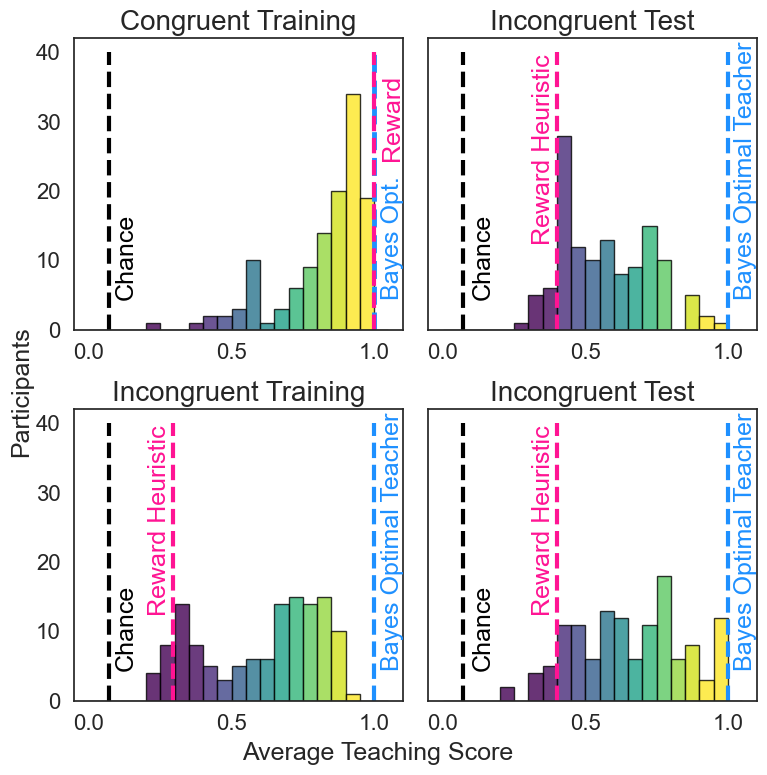

In [13]:
# results for fig 3A

# Group the data by group, subjID, and block, and sum edge_normresp_U_fr_bonus
grouped_data = preprocessed.groupby(["group", "subjID", "block"]).edge_normresp_U_obm.sum().reset_index()

def plot_histogram(data, group, block, ax):
    chance = (1/14)*20
    modelperf= pd.DataFrame({"chance":[ chance,chance,chance,chance],
                    'group':["II","II","CI","CI"],
                    'block':["Training","Test","Training","Test"],
                    'OBM':[20,5,20,5],
                    'Reward':[5.89,2.01,20,2.01]})
    binsize = [x / 20.0 for x in range(0, 22, 1)]
    OBM = modelperf[(modelperf.group ==group) & (modelperf.block== block)].OBM.values[0]
    ntrial = OBM
    normalized_data = np.divide(data,ntrial)
    n, bins, patches = ax.hist(normalized_data,bins =binsize, edgecolor='black', alpha=0.8, color='blue',)
    colors = plt.cm.viridis(np.linspace(-.6, 1.2, len(patches)))
    
    color_column = []
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)
        # color_column.extend([color] * len(data[(normalized_data >= patch.xy[0]) & (normalized_data < patch.xy[1])]))
        

    color_list = []
    for value in normalized_data:
        bin_index = np.digitize(value, bins) - 1
        bin_index = min(bin_index, len(colors) - 1)  # Ensure index is within range
        color_list.append(colors[bin_index])

    data['color'] = color_list

    grouptitle = "Incongruent"
    OBM = modelperf[(modelperf.group ==group) & (modelperf.block== block)].OBM
    Reward = modelperf[(modelperf.group ==group) & (modelperf.block== block)].Reward     
    ymax = 40
    alpha = 1
    linewidth = 3
   
    obmtitle = 'Bayes Optimal Teacher'
    rewardtitle = 'Reward Heuristic'
    chance = (1/14)*OBM
    if block == "Test": 
        chancemove= chance+.15 
        obmmove= OBM+.1
        rewardmove = Reward - .45
        rewardhight= ymax-27
    else:
        block = 'Training' 
        chancemove = chance+.35
        obmmove=OBM+.5
        rewardmove = Reward- 1.75
        rewardhight= ymax-27
        #set xlimit to 0 to 25
        # ax.set_xlim(0,22)
        if group == 'CI':
            rewardhight= ymax-15
            rewardmove = Reward+ .5
            alpha = 1
            linewidth = 3.5
            grouptitle = "Congruent"
            obmtitle = 'Bayes Opt.'
            rewardtitle = 'Reward'
            
    ax.set_title(f'{grouptitle} {block}', size=20)
    ax.vlines(x=chance/ntrial, ymin=0, ymax=ymax, color='black', linewidth=3, linestyle='--')
    ax.annotate('Chance', xy=(chance/ntrial, 0), xytext=(chancemove/ntrial, ymax-35), rotation=90, size=18, color='black')
    
    ax.vlines(x=OBM/ntrial, ymin=0, ymax=ymax, color='dodgerblue', linewidth=linewidth, linestyle='--', alpha=alpha)
    ax.annotate(obmtitle, xy=(OBM/ntrial, 0), xytext=(obmmove/ntrial, ymax-35), rotation=90, size=18, color='dodgerblue')

    ax.vlines(x=Reward/ntrial, ymin=0, ymax=ymax, color='deeppink', linewidth=3, linestyle='--',alpha = alpha)
    ax.annotate(rewardtitle, xy=(Reward/ntrial, 0), xytext=(rewardmove/ntrial, rewardhight), rotation=90, size=18, color='deeppink')  
    
    if block == "Test": 
        #  ax.set_xticks([1, 2, 3, 4, 5])
         ax.set_yticklabels("")

        # Assign colors to the data

    # print(data)
    return data

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
sns.set(style="white", font_scale=1)


# Split the grouped data into the four combinations of group and block
ci_train = grouped_data[(grouped_data['group'] == 'CI') & (grouped_data['block'] == 'training')]
ci_test = grouped_data[(grouped_data['group'] == 'CI') & (grouped_data['block'] == 'test')]
ii_train = grouped_data[(grouped_data['group'] == 'II') & (grouped_data['block'] == 'training')]
ii_test = grouped_data[(grouped_data['group'] == 'II') & (grouped_data['block'] == 'test')]

# Plot each histogram and get the updated data with colors
ci_train_hist = plot_histogram(ci_train['edge_normresp_U_obm'], 'CI', 'Training', ax[0, 0])
ci_test_hist = plot_histogram(ci_test['edge_normresp_U_obm'], 'CI', 'Test', ax[0, 1])
ii_train_hist = plot_histogram(ii_train['edge_normresp_U_obm'], 'II', 'Training', ax[1, 0])
ii_test_hist = plot_histogram(ii_test['edge_normresp_U_obm'], 'II', 'Test', ax[1, 1])

ci_train['color'] = ci_train_hist['color']
ci_test['color'] = ci_test_hist['color']
ii_train['color'] = ii_train_hist['color']
ii_test['color'] = ii_test_hist['color']

# Combine the updated data with color information
updated_grouped_data = pd.concat([ci_train, ci_test, ii_train, ii_test], ignore_index=True)

# Set common labels
fig.text(0.5, 0.04, 'Average Teaching Score', ha='center', size=18)
fig.text(0.04, 0.5, 'Participants', va='center', rotation='vertical', size=18)

for axis in ax.flatten():
    # Set x-axis ticks to increase by 0.5
    axis.set_xticks(np.arange(0, 1.1, 0.5))
    # Set y-axis ticks to increase by 10
    axis.set_yticks(np.arange(0, 50, 10))
    axis.tick_params(axis='x', labelsize=16) 
    axis.tick_params(axis='y', labelsize=16) 

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Adjust the layout to make room for the labels


Mann-Whitney U test statistic: 5703.5
P-value: 7.90409983258636e-05
TtestResult(statistic=np.float64(-4.2684717289330925), pvalue=np.float64(2.792441485110906e-05), df=np.float64(251.0))


C:\Users\skh\AppData\Local\Temp\ipykernel_38192\3836013608.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Congruent', 'Incongruent'],fontsize= 16)


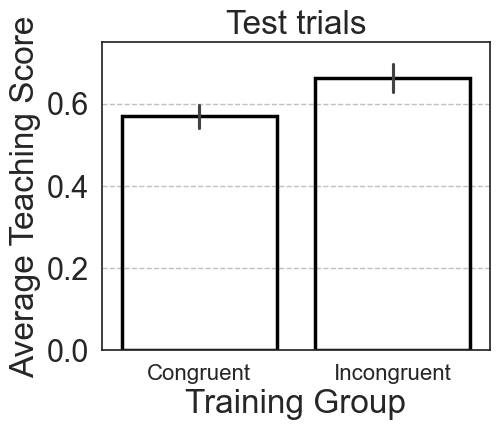

In [14]:
#results for fig 3B

from scipy.stats import mannwhitneyu
import scipy.stats as stats

sns.set(style="white", font_scale=2)
fig, ax = plt.subplots(figsize = (5,4))

test_data = preprocessed[preprocessed.block=='test'].reset_index(drop=True)
test_data_subj = test_data.groupby(['subjID','group'])['edge_normresp_U_obm'].mean().reset_index()

g = sns.barplot(
        x = test_data_subj.group,
        y = test_data_subj.edge_normresp_U_obm,
        ax = ax,
        linewidth=2.5, edgecolor=["0","0"], facecolor=(0, 0, 0, 0),
        # errorbar=('ci',95)  
    )
g.set_ylim(0,.75)
g.set_title('Test trials')
g.set_ylabel('Average Teaching Score' )
g.set_xlabel('Training Group' )
g.set_xticklabels(['Congruent', 'Incongruent'],fontsize= 16)
g.set_axisbelow(True)
g.yaxis.grid(color='gray', linestyle='--',alpha=0.5)

# Separate the data into two groups: CI and II
group_CI = test_data_subj[test_data_subj['group'] == 'CI']['edge_normresp_U_obm']
group_II = test_data_subj[test_data_subj['group'] == 'II']['edge_normresp_U_obm']

# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(group_CI, group_II)

print(f"Mann-Whitney U test statistic: {u_statistic}")
print(f"P-value: {p_value}")

    # Perform independent samples t-test
t_test_result = stats.ttest_ind(group_CI, group_II)

print(t_test_result)

In [15]:
#results fig 3C
for i, row in df_fits.iterrows():
    df_fits.at[i, 'BIC'] = np.log(40) * row.nparam + 2 * row.nll
    df_fits.at[i, 'bonus'] = bonus[row.subjID]

models = df_fits.model.unique()
plotdf = df_fits[df_fits.model.isin(models)]
plotdf['avg_bonus'] = plotdf['bonus'] / 5  # Assuming 'bonus' needs to be divided by 40 to get avg_bonus

# Add the color column from updated_grouped_data
plotdf['color'] = ''

for i, row in plotdf.iterrows():
    subj = row['subjID']
    plotdf.at[i, 'color'] = updated_grouped_data[(updated_grouped_data['subjID'] == subj) &(updated_grouped_data['block'] == 'test')]['color'].values[0]

# Function to create the plot for each group
def create_plot(data, group_name):
    sns.set(style="whitegrid", font_scale=1.5)
    fig, ax = plt.subplots(figsize=(3, len(models) * 0.55))  # Adjusted height for compact y-axis
    color = ['deeppink', 'dodgerblue']
    # Plot pointplot with error bars
    g = sns.pointplot(
        data=data,
        y='model',
        x='BIC',
        color = 'black',
        # palette=color,
        errorbar=('ci', 95),
        estimator=np.mean,
        n_boot=1000,
        linestyle='none',
        ax=ax
    )

    for i, row in data.iterrows():
        jitter = np.random.normal(0, 0.07)  # Add jitter to y-coordinate
        ax.scatter(row['BIC'], np.where(models == row['model'])[0][0] + jitter, color=row['color'], alpha=0.5, s=25, zorder=0)
    
    # Customize ticks and labels with larger font size
    ax.set_xlabel('BIC', fontsize=16, weight='bold')
    ax.set_ylabel('')
    ax.set_title(f'Test Trials after {group_name} Training', fontsize    = 18, x=0.1)    
    # Adjust the space between y-axis labels by reducing the height per category
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
    ax.set_ylim(-0.5, len(models) - 0.5)  # Add padding to the y-axis limits to avoid cutting off points
    ax.set_xlim(0,34)
    plt.xticks(np.arange(0, 30+1, 10))

    
    sns.despine(trim=True)
    plt.show()

C:\Users\skh\AppData\Local\Temp\ipykernel_38192\3767414262.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


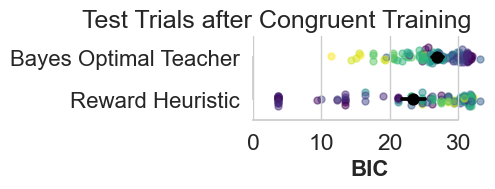

Mann-Whitney U test statistic: 8059.0
P-value: 0.6668634952107829


In [16]:
create_plot(plotdf[plotdf['group'] == 'CI'], 'Congruent')
# model comparison for congruent test trials
bic_opt = plotdf[(plotdf['group'] == 'CI') & (plotdf['model'] == 'Bayes Optimal Teacher')].BIC
bic_heu = plotdf[(plotdf['group'] == 'CI') & (plotdf['model'] == 'Reward Heuristic')].BIC
# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(bic_opt, bic_heu)

print(f"Mann-Whitney U test statistic: {u_statistic}")
print(f"P-value: {p_value}")

C:\Users\skh\AppData\Local\Temp\ipykernel_38192\3767414262.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


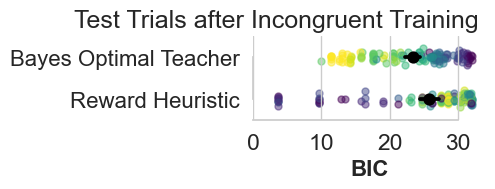

Mann-Whitney U test statistic: 5461.0
P-value: 4.019746531804476e-06


In [17]:
# model comparison for incongruent test trials
create_plot(plotdf[plotdf['group'] == 'II'], 'Incongruent')
bic_opt = plotdf[(plotdf['group'] == 'II') & (plotdf['model'] == 'Bayes Optimal Teacher')].BIC
bic_heu = plotdf[(plotdf['group'] == 'II') & (plotdf['model'] == 'Reward Heuristic')].BIC
# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(bic_opt, bic_heu)

print(f"Mann-Whitney U test statistic: {u_statistic}")
print(f"P-value: {p_value}")

Models in plot: ['Bayes Optimal Teacher' 'Reward Heuristic']


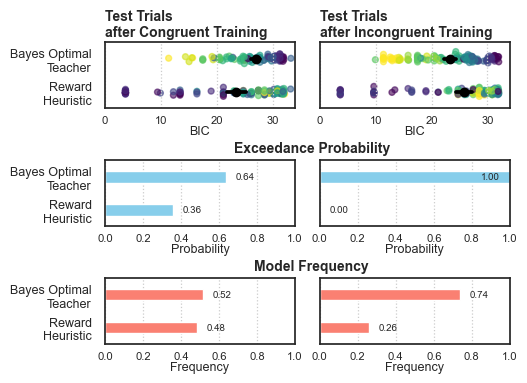

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions.model_comparison import *

def plot_exp2_combo(df_fits, updated_grouped_data, bonus,
                    *, group_col='group',
                    left_key='Congruent', right_key='Incongruent',
                    group_map={'CI':'Congruent', 'II':'Incongruent'},
                    model_order=None,
                    figsize=(6, 6),
                    bic_xlim=(0, 34), bic_xticks=(0, 10, 20, 30),
                    n_boot=1000,
                    bar_height=0.36,
                    ex_color='skyblue', fr_color='salmon'):
    """
    EXP 2 compact plot (3 rows × 2 cols):
      Row1: BIC (mean±95% CI) + jittered points
      Row2: Exceedance Probability  (shared row title; x-labels kept on panels)
      Row3: Model Frequency         (shared row title; x-labels kept on panels)
    Requires vb_from_long(df_long) in scope.
    """
    sns.set(style="white", font_scale=0.9)
    # --- Prep & normalize ---
    df = df_fits.copy()
    df['BIC'] = np.log(40) * df['nparam'] + 2 * df['nll']
    df['bonus'] = df['subjID'].map(bonus)

    color_map = (updated_grouped_data
                 .loc[updated_grouped_data['block'] == 'test', ['subjID','color']]
                 .drop_duplicates('subjID').set_index('subjID')['color'])
    df['color'] = df['subjID'].map(color_map)

    # map CI/II -> names if needed
    groups_present = set(df[group_col].dropna().astype(str).unique())
    if (left_key not in groups_present) or (right_key not in groups_present):
        df[group_col] = df[group_col].replace(group_map)

    if model_order is None:
        model_order = list(pd.unique(df['model']))
    df = df[df['model'].isin(model_order)]
    models = np.array(model_order)
    print(f"Models in plot: {models}")

    # ---- NEW: pretty multi-line y labels (break before last word) ----
    def _break_before_last_word(s):
        parts = s.rsplit(' ', 1)
        return "\n".join(parts) if len(parts) > 1 else s
    pretty_labels = [_break_before_last_word(m) for m in model_order]
    # ------------------------------------------------------------------

    dL = df[df[group_col] == left_key]
    dR = df[df[group_col] == right_key]
    if dL.empty or dR.empty:
        raise ValueError(f"Missing data for '{left_key}' or '{right_key}' in '{group_col}'.")

    # Shared y across all panels → identical model order & ticks everywhere
    fig, ax = plt.subplots(3, 2, figsize=figsize, sharey=True)

    # ---------- Row 1: BIC ----------
    def bic_panel(Ax, data):
        sns.pointplot(
            data=data, y='model', x='BIC', order=model_order,
            color='black', errorbar=('ci', 95), markersize=5,
            estimator=np.mean, n_boot=n_boot, linestyle='none', ax=Ax
        )
        # jittered subject points
        y_index = {m: i for i, m in enumerate(models)}
        yv = data['model'].map(y_index).to_numpy()
        xv = data['BIC'].to_numpy()
        jitter = np.random.normal(0, 0.055, size=len(data))
        cols = [('gray' if (c is None or (isinstance(c, (float, np.floating)) and np.isnan(c))) else c)
                for c in data['color'].to_numpy()]
        Ax.scatter(xv, yv + jitter, c=cols, alpha=0.6, s=18, zorder=0)

        # consistent look + labels
        Ax.set_yticks(np.arange(len(model_order)))
        Ax.set_yticklabels(pretty_labels, fontsize=9)  # <-- CHANGED to multi-line
        Ax.set_xlabel('BIC', fontsize=9, labelpad=-0)
        Ax.set_ylabel('')
        Ax.set_xlim(*bic_xlim); Ax.set_xticks(list(bic_xticks))
        Ax.set_ylim(-0.5, len(model_order) - 0.5)
        Ax.tick_params(axis='x', labelsize=8, pad=-1)
        Ax.grid(axis='x', linestyle=':', linewidth=0.9)
        Ax.invert_yaxis()

    # top titles (left-aligned, 2 lines to avoid collision)
    ax[0,0].set_title("Test Trials\nafter Congruent Training",   fontsize=10, weight='bold', loc='left', pad=4)
    ax[0,1].set_title("Test Trials\nafter Incongruent Training", fontsize=10, weight='bold', loc='left', pad=4)

    bic_panel(ax[0,0], dL)
    bic_panel(ax[0,1], dR)

    # ---------- Rows 2–3: VB metrics ----------
    def vb_vectors(data):
        long = data[['subjID','model','BIC']]
        mcols, r_std, phi = vb_from_long(long)
        exph = pd.Series(phi,   index=mcols).reindex(model_order, fill_value=0).to_numpy()
        freq = pd.Series(r_std, index=mcols).reindex(model_order, fill_value=0).to_numpy()
        return exph, freq

    def barh_panel(Ax, vec, xlabel, color):
        y = np.arange(len(model_order))
        bars = Ax.barh(y, vec, height=bar_height, color=color)
        Ax.set_yticks(y)
        Ax.set_yticklabels(pretty_labels, fontsize=9)  # <-- CHANGED to multi-line
        Ax.set_xlabel(xlabel, fontsize=9, labelpad=0)
        Ax.set_xlim(0, 1)
        Ax.grid(axis='x', linestyle=':', linewidth=0.9)
        Ax.tick_params(axis='x', labelsize=8, pad=-1)
        Ax.invert_yaxis()
        for b in bars:
            w = b.get_width(); yy = b.get_y() + b.get_height()/2
            if w == 1:
                Ax.text(min(w - 0.15, 0.98), yy, f"{w:.2f}", va='center', fontsize=7)
            else:
                Ax.text(min(w + 0.05, 0.98), yy, f"{w:.2f}", va='center', fontsize=7)

    exL, frL = vb_vectors(dL); exR, frR = vb_vectors(dR)
    barh_panel(ax[1,0], exL, "Probability", ex_color)
    barh_panel(ax[1,1], exR, "Probability", ex_color)
    barh_panel(ax[2,0], frL, "Frequency",  fr_color)
    barh_panel(ax[2,1], frR, "Frequency",  fr_color)

    # --- Shared row titles (centered above rows 2 & 3) ---
    fig.tight_layout(rect=[0.1, .3, 1, 0.96], h_pad=1.5, w_pad=0.6)
    fig.canvas.draw()
    
    def row_top_y(i):
        return max(ax[i,0].get_position().y1, ax[i,1].get_position().y1) + 0.008

    fig.text(0.63, row_top_y(1), "Exceedance Probability", ha='center', va='bottom',
             fontsize=10, weight='bold')
    fig.text(0.63, row_top_y(2), "Model Frequency", ha='center', va='bottom',
             fontsize=10, weight='bold')
    
    return fig, ax

fig, axes = plot_exp2_combo(
    df_fits=df_fits,
    updated_grouped_data=updated_grouped_data,
    bonus=bonus,
    group_col='group',
    left_key='Congruent', right_key='Incongruent',
    model_order=['Bayes Optimal Teacher','Reward Heuristic'],
    figsize=(6, 6)
)
plt.savefig('Exp2_Combo_Plot.pdf', dpi=300, bbox_inches='tight')
plt.show()


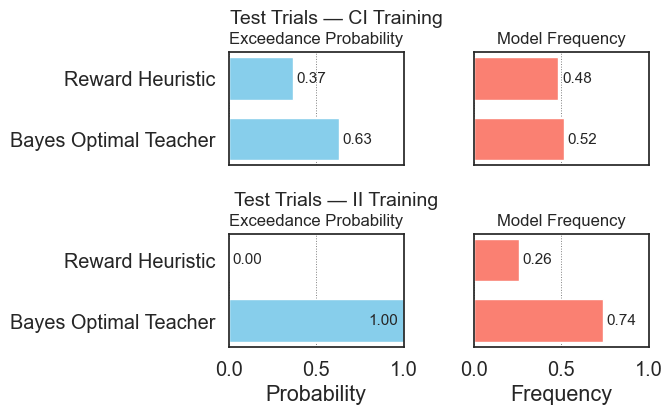

In [19]:
from functions.model_comparison import *

rename_group_map = {
    "CI": "Congruent",
    "II": 'Incongruent',
}
plotdf['group'] = plotdf['group'].replace(rename_group_map)


model_order = [
    'Bayes Optimal Teacher',
    'Reward Heuristic',
]

sns.set(style="white", font_scale=1.3)
fig, axes = plot_vb_exp(df_fits, 
                        exp=2, 
                        group_col='group', 
                        # condition_col='condition', 
                        model_order=['Bayes Optimal Teacher', 'Reward Heuristic'],hide_top_xlabels=True,
                        figsize_per_row=(6,1.8)
                        )
# plt.tight_layout()
plt.show()



In [20]:
simdata = pd.DataFrame(pd.read_pickle('data/sim/exp2/exp2_modelsim.pickle'))
rename_simdata_map = {
    "PathAvgUtility": 'Path Avg Utility',
    "feature_levels": "Depth Heuristic",
    "feature_reward_sum": "Reward Heuristic",
    "OBM_AU": "Bayes Optimal Teacher",
    "NBM_AU": "No Inv. Plan. Bayes Teacher",
    "POM_AU": "Prior-only Bayes Teacher",
}
simdata.rename(columns=rename_simdata_map, inplace=True)

posterior_sim = pd.read_pickle('data/sim/exp2/exp2_posterior_sim_100.pkl')
rename_posterior_sim_map = {
    "Q-values": "Q-values",
    "PathAvgUtility": 'Path Avg. Utility',
    "Level": "Depth Heuristic",
    "Reward": "Reward Heuristic",
    'Level,Reward': 'Reward & Depth Heuristic',
    "OBM": "Bayes Optimal Teacher",
    "NBM": "No Inv. Plan. Bayes Teacher",
    "POM": "Prior-only Bayes Teacher",
}
posterior_sim['sim_model'] = posterior_sim['sim_model'].replace(rename_posterior_sim_map)

sim_fits = pd.read_pickle("data/sim/exp2/exp2_simfits_100.pkl")
sim_fits['sim_model'] = sim_fits['sim_model'].replace(rename_posterior_sim_map)
sim_fits['fit_model'] = sim_fits['fit_model'].replace(rename_posterior_sim_map)

rename_group_map = {
    "CI": "Congruent",
    "II": 'Incongruent',
}
preprocessed['group'] = preprocessed['group'].replace(rename_group_map)
df_fits['group'] = df_fits['group'].replace(rename_group_map)
groups = dict(df_fits.groupby('group').subjID.unique())

sim_fits['group'] = ''
posterior_sim['group'] = ''

for key in groups:
    sim_fits.loc[sim_fits['subjID'].isin(groups[key]), 'group'] = key
    posterior_sim.loc[posterior_sim['subjID'].isin(groups[key]), 'group'] = key

In [21]:
# Find the row index with the min BIC per subjID
idx = df_fits.groupby(["subjID",'group'])["BIC"].idxmin()

# # Use those indices to get the rows
best_models = df_fits.loc[idx].reset_index(drop=True)

merged = posterior_sim.merge(
    best_models,
    left_on=["subjID", "sim_model"],
    right_on=["subjID", "model"],
    how="inner"
)

best_models.groupby(['model','group']).BIC.size()

model                  group      
Bayes Optimal Teacher  Congruent      66
                       Incongruent    93
Reward Heuristic       Congruent      59
                       Incongruent    35
Name: BIC, dtype: int64

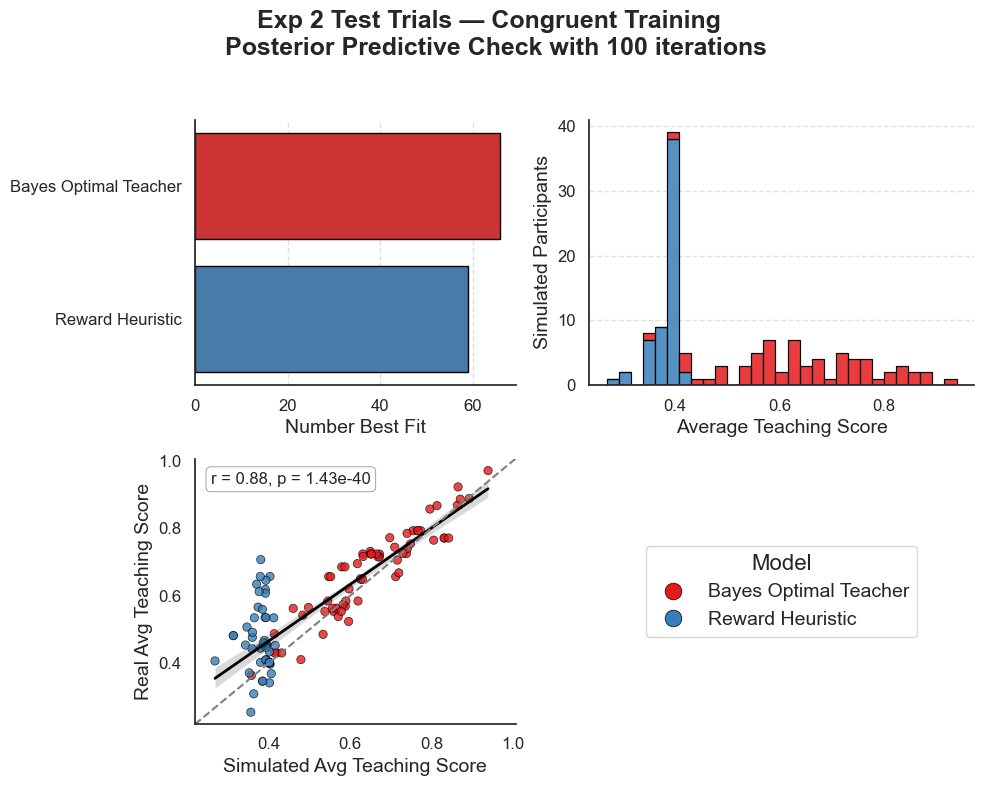

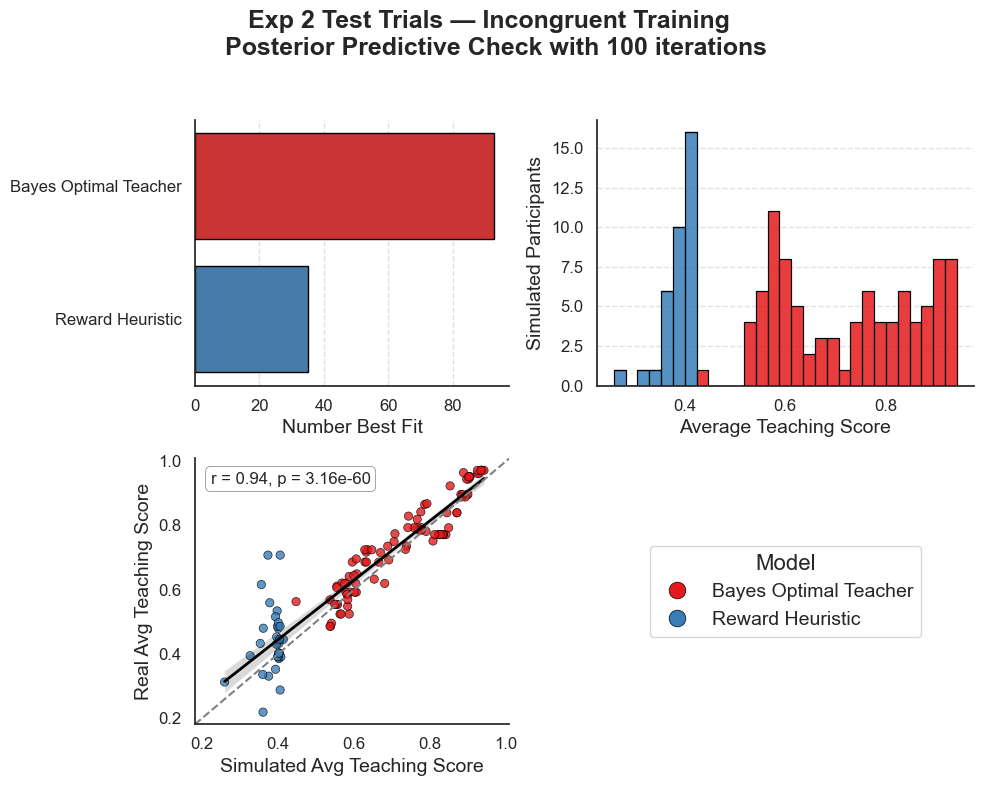

In [22]:
# expects: best_models_exp2, merged_exp2, and (optionally) real_df_exp2 with ['subjID', real_score_col]
ids_by_group = best_models.groupby('group')['subjID'].unique()

figs_e2 = {}
for g, ids in ids_by_group.items():
    real_df = preprocessed.loc[preprocessed.block == 'test',['subjID', 'edge_normresp_U_obm']].reset_index(drop=True)
    figs_e2[g], _ = run_ppc_for_ids(best_models, merged, ids,
                                     real_df=real_df,
                                     real_score_col="edge_normresp_U_obm",
                                     title_prefix=f"Exp 2 Test Trials — {g} Training",
                                     figsize=(10,8))
plt.show()


Overall recovery (diagonal) = 0.808  [40871/50600]


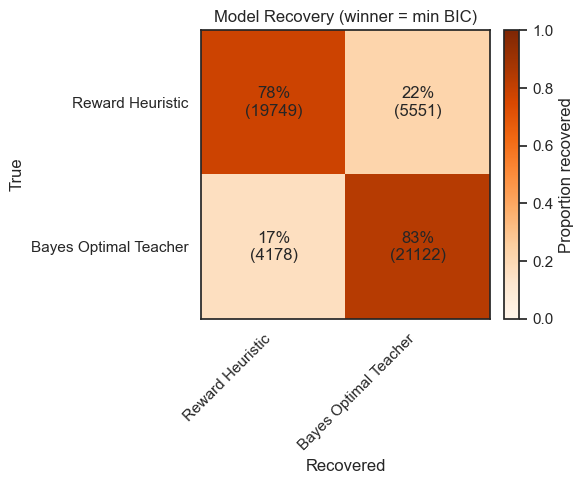

In [23]:
model_order = [
    "Reward Heuristic",
    "Bayes Optimal Teacher",
]
counts, props, fig = model_recovery_plot(sim_fits, metric="BIC", order=model_order)

# # use to plot per group plot [CI,II]
# for key in groups:
#     counts, props, fig = model_recovery_plot(sim_fits[sim_fits.group == key].reset_index(drop=True), metric="BIC", order=model_order)
#     if key == 'key':
#         fig.suptitle(f"Exp 2 Test Trials after Congruent Training", fontsize=12,x= 0.1)
#     else:
#         fig.suptitle(f"Exp 2 Test Trials after Incongruent Training", fontsize=12,x= 0.1)

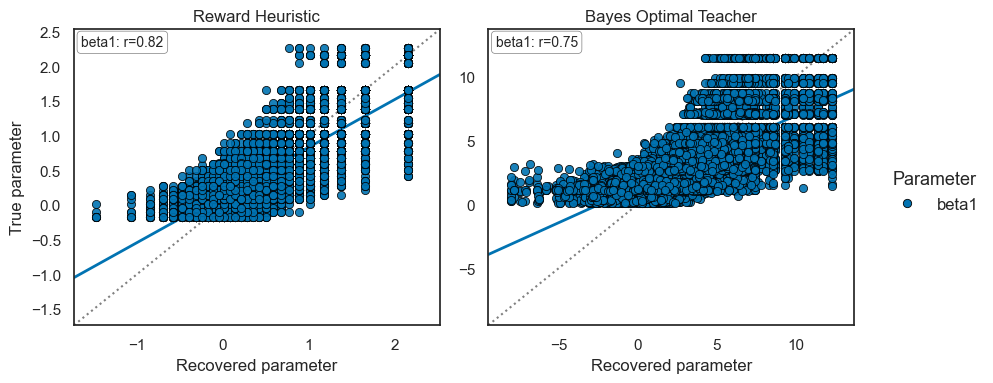

In [24]:
param_long = build_param_recovery_long(true_df=df_fits,  # your “true betas” df
                                       sim_fits_all=sim_fits)
param_long_plot = filter_param_outliers(
    param_long,
    method="mad",        # robust default
    mad_thresh=4.5,      # slightly stricter than 4.0; adjust as you like
    iqr_k=3.0            # 'extreme' Tukey fence fallback
)

fig, axes = plot_param_recovery_grid(
    param_long_plot,
    model_order=[
        "Reward Heuristic",
         "Bayes Optimal Teacher",
    ],
    ncols=2,
    pad=0.07,
    clip_quantiles=None,        
    # model_title_map=model_title_map
)
plt.show()
